In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [2]:
x = load_iris().data

In [3]:
print(x.shape)

(150, 4)


In [4]:
feature_names  =load_iris().feature_names
print('Feature Names : ',feature_names)
print('Labels : ',load_iris().target_names)

Feature Names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels :  ['setosa' 'versicolor' 'virginica']


In [5]:
Sum_Square_Error = [] # for store cost or error value in list for choosing best value of K 

In [6]:
for k in range(1,8): 
    model = KMeans(n_clusters=k,n_init= 'auto',init='k-means++')
    model.fit(x)
    Sum_Square_Error.append(model.inertia_)

In [7]:
print(Sum_Square_Error)

[681.3706, 152.3479517603579, 78.85144142614601, 71.76373890975626, 49.85942424242425, 41.980628019323674, 37.69165391275392]


Text(0, 0.5, 'Sum Square Error')

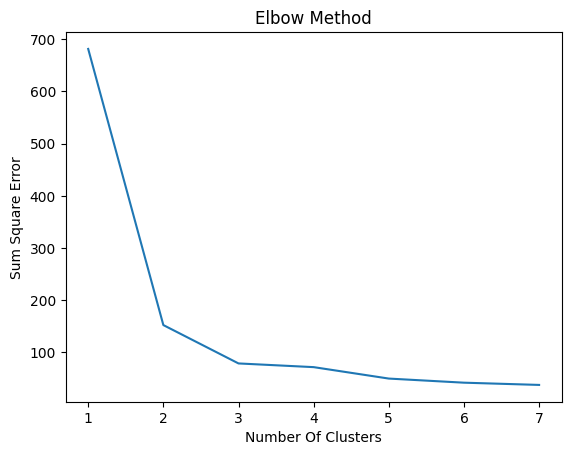

In [8]:
plt.plot(range(1,(len(Sum_Square_Error)+1)) ,Sum_Square_Error )
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Square Error')

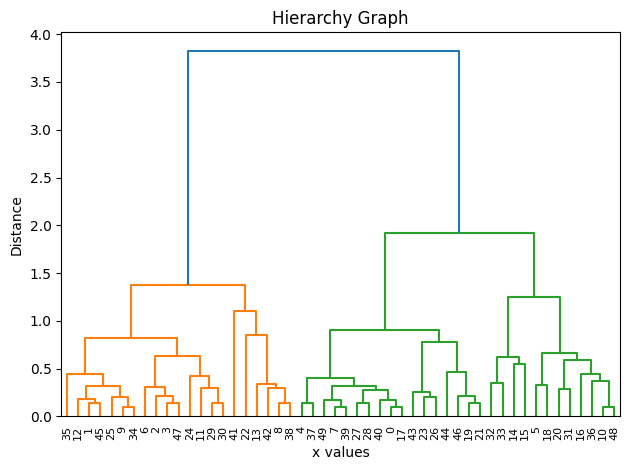

In [9]:
hc = sch.dendrogram(sch.linkage(x[:50,:],method='ward'))
plt.title('Hierarchy Graph')
plt.xlabel('x values')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

from above graphs , the best value for number of clusters is 3 , K = 3

In [10]:
Model = KMeans(n_clusters=3,n_init='auto',init='k-means++')
Model.fit(x)
ypred = Model.predict(x)

centers = Model.cluster_centers_
error = Model.inertia_
lables = set(Model.labels_)

print('Centers : ',centers)
print('Cost : ',error)
print('Labels : ',lables)


Centers :  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Cost :  78.8556658259773
Labels :  {0, 1, 2}


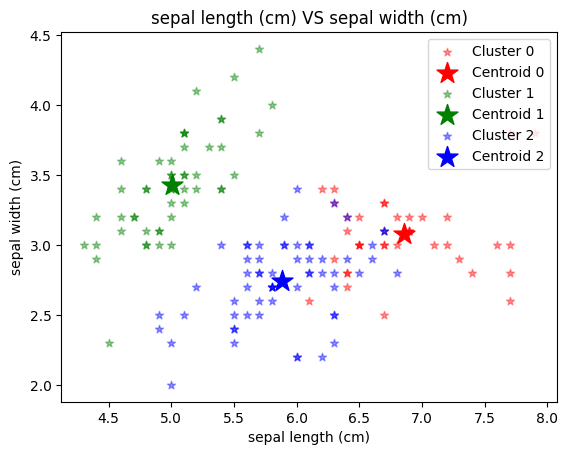

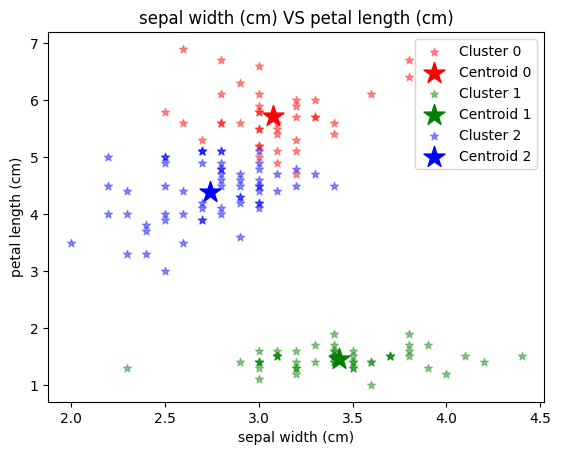

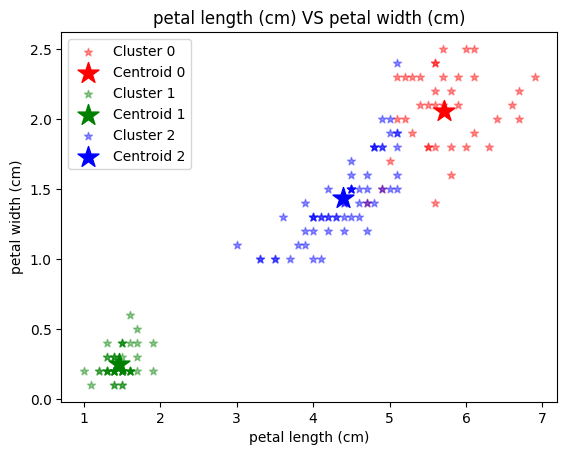

In [11]:
for i in range(3):
    plt.scatter(x[ypred==0,i],x[ypred==0,i+1], color='red',alpha=0.4,label='Cluster 0',marker='*')
    plt.scatter(centers[0,i],centers[0,i+1],color='red',s=250,marker='*',label='Centroid 0')
    plt.scatter(x[ypred==1,i],x[ypred==1,i+1], color='green',alpha=0.4,label='Cluster 1',marker='*')
    plt.scatter(centers[1,i],centers[1,i+1],color='green',s=250,marker='*',label='Centroid 1')
    plt.scatter(x[ypred==2,i],x[ypred==2,i+1], color='blue',alpha=0.4,label='Cluster 2',marker='*')
    plt.scatter(centers[2,i],centers[2,i+1],color='blue',s=250,marker='*',label='Centroid 2')
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[i+1])
    plt.title(f"{feature_names[i]}"+" VS " + f"{feature_names[i+1]}")
    plt.legend()
    plt.show()

